In [1]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print("Path to dataset files:", path)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/adilshamim8/social-media-addiction-vs-relationships/versions/3


In [2]:
!cp -r $path/"Students Social Media Addiction.csv" .
! mv ./"Students Social Media Addiction.csv" ./Students-Social-Media-Addiction.csv

In [3]:
file="Students-Social-Media-Addiction.csv"

In [4]:
!pip install pandas matplotlib seaborn scikit-learn xgboost joblib numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report
import xgboost as xgb
import joblib
import kagglehub
%matplotlib inline
import os
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(file)

In [6]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [8]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [9]:
#converting all column names to lower case
df.columns = df.columns.str.lower()

Student Id is not a useful data . So we can delete that column

In [10]:
df.drop('student_id', axis=1, inplace=True)

In [11]:
df.head()

,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
dtype: int64


In [13]:
print("Statistic Values:")
df.describe()

Statistic Values:


,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


/tmp/ipykernel_15899/3878251097.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


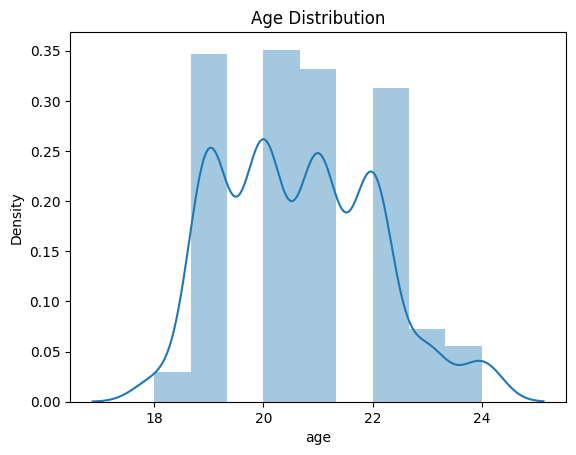

In [14]:
# plotting the age distribution for the data
plt.figure
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

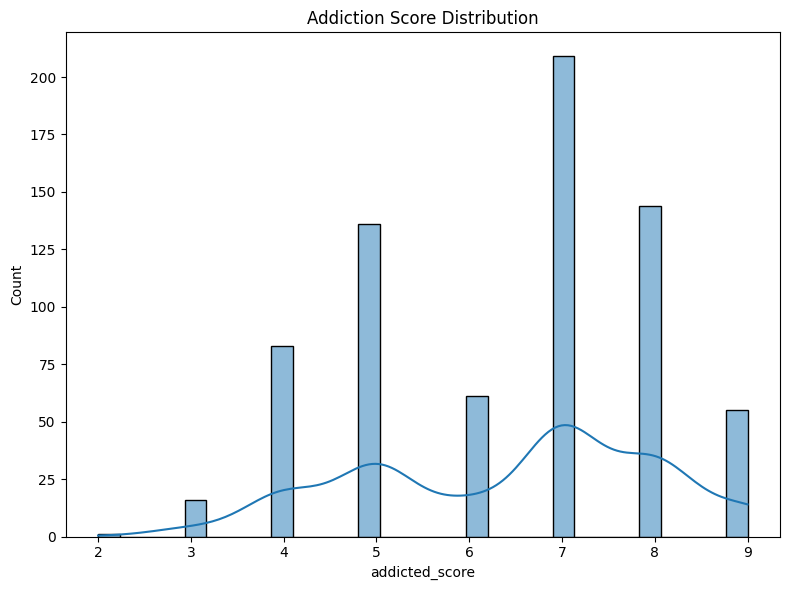

In [15]:
#check the distribution for target column - Addiction score
plt.figure(figsize=(8,6))
ax = sns.histplot(df['addicted_score'], kde=True, bins=30)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # show integer ticks
plt.title('Addiction Score Distribution')
plt.xlabel('addicted_score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

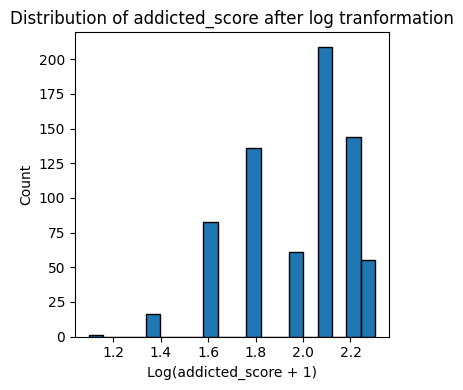

In [16]:
log_score = np.log1p(df.addicted_score)

plt.figure(figsize=(4,4))

sns.histplot(log_score, bins=20,  alpha=1)
plt.ylabel('Count')
plt.xlabel('Log(addicted_score + 1)')
plt.title('Distribution of addicted_score after log tranformation')
plt.tight_layout()
plt.show()

In [17]:
df.columns

Index(['age', 'gender', 'academic_level', 'country', 'avg_daily_usage_hours',
       'most_used_platform', 'affects_academic_performance',
       'sleep_hours_per_night', 'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score'],
      dtype='object')

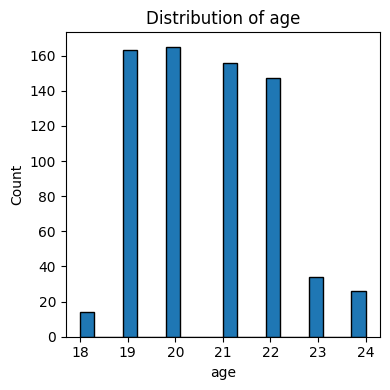

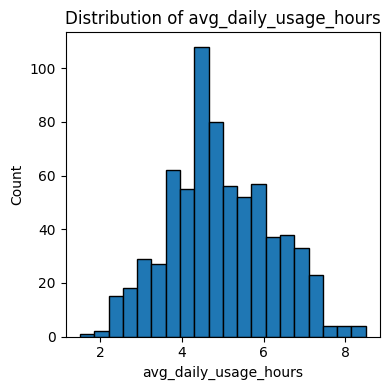

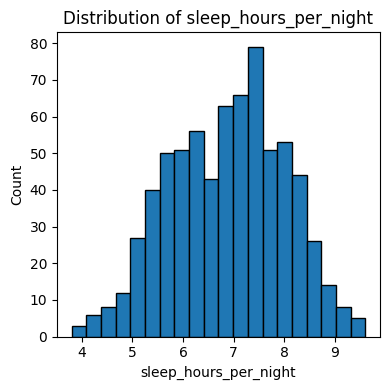

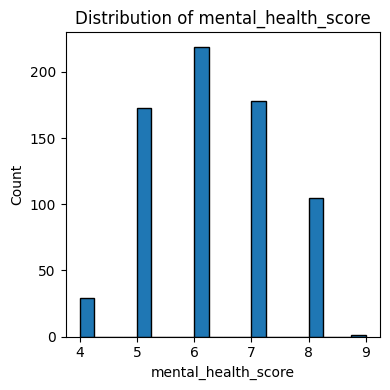

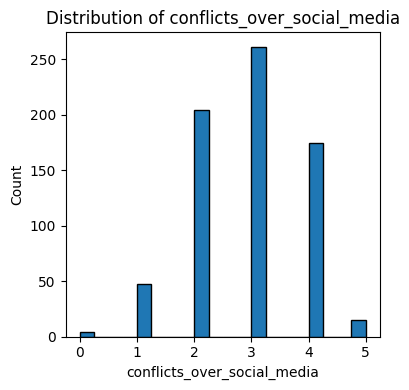

In [18]:
#corelation plot for numerical columns
num_col = ['age','avg_daily_usage_hours','sleep_hours_per_night','mental_health_score','conflicts_over_social_media']

for col in num_col:
    plt.figure(figsize=(4,4))
    sns.histplot(df[col], bins=20,  alpha=1)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

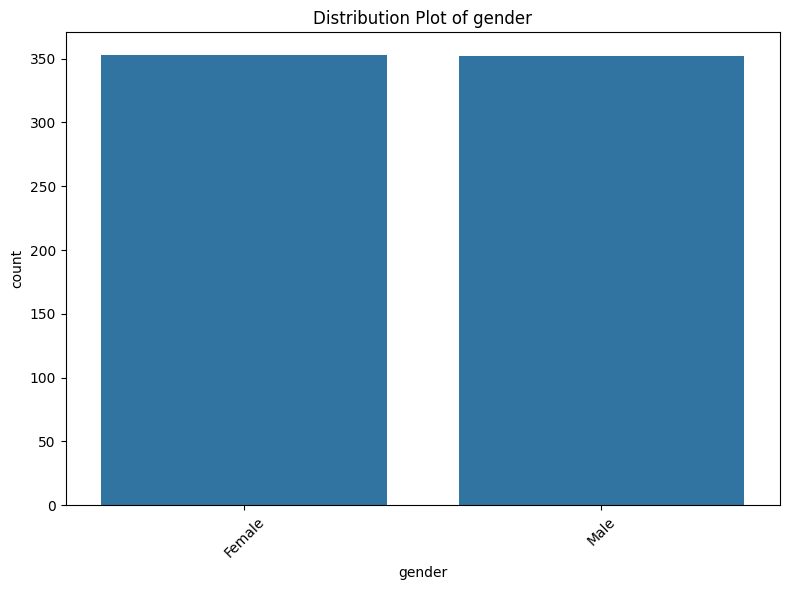

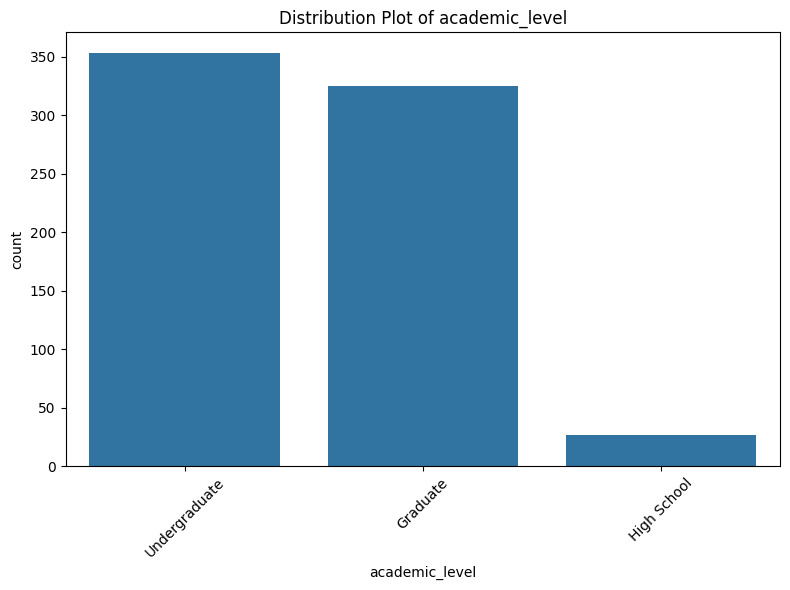

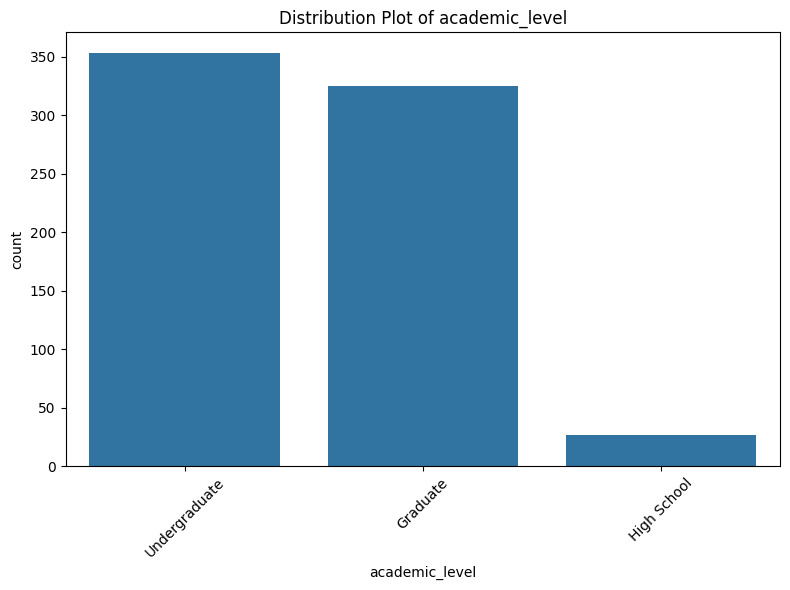

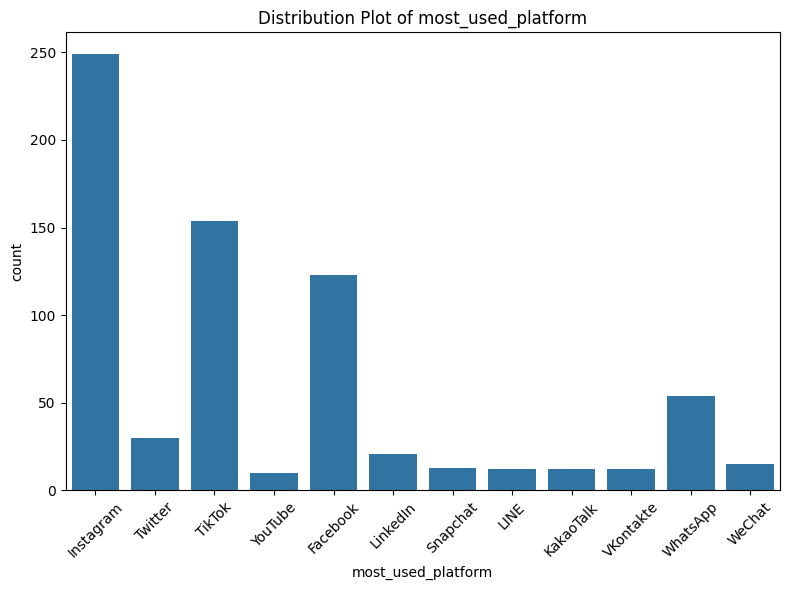

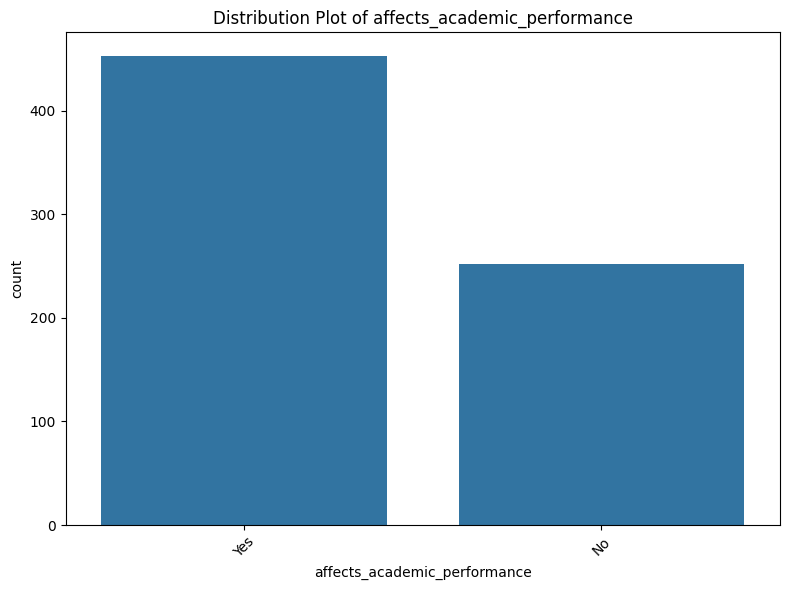

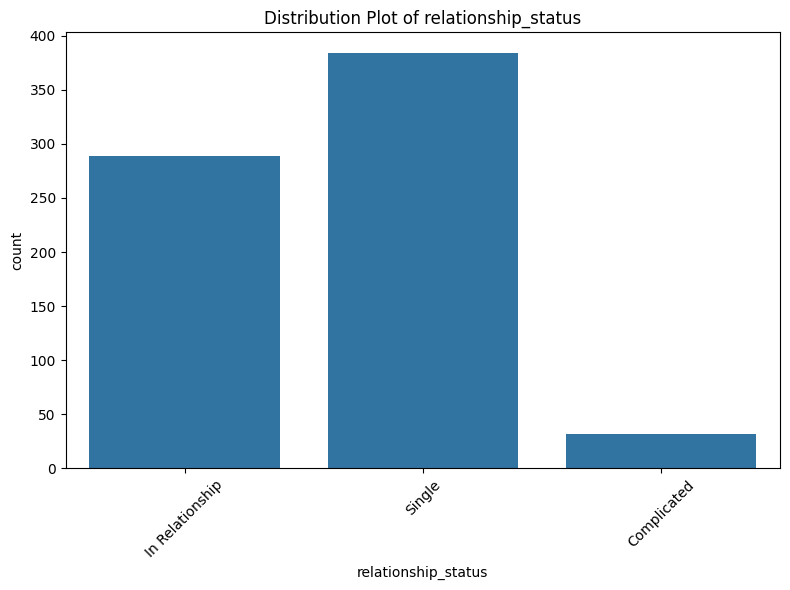

In [19]:
#now lets plot the ctegorical columns as well
cat_col = ['gender', 'academic_level','academic_level','most_used_platform','affects_academic_performance','relationship_status']
for col in cat_col:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [20]:
#Feature importance: Mutual information
from sklearn.metrics import mutual_info_score

In [21]:
for col in num_col:
    mi = mutual_info_score(df[col], df['addicted_score'])
    print(f"Mutual Information between 'addicted_score' and '{col}': {mi:.2f}")

Mutual Information between 'addicted_score' and 'age': 0.11
Mutual Information between 'addicted_score' and 'avg_daily_usage_hours': 0.73
Mutual Information between 'addicted_score' and 'sleep_hours_per_night': 0.63
Mutual Information between 'addicted_score' and 'mental_health_score': 1.10
Mutual Information between 'addicted_score' and 'conflicts_over_social_media': 1.07


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:69: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:69: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


The importance is in the following order:

1.conflicts_over_social_media

2.mental_health_score

3.avg_daily_usage_hours

4.sleep_hours_per_night

5.age

---



**Correlation coefficien**

In [22]:
df[num_col].corrwith(df['addicted_score'])

age                           -0.166396
avg_daily_usage_hours          0.832000
sleep_hours_per_night         -0.764858
mental_health_score           -0.945051
conflicts_over_social_media    0.933586
dtype: float64

Age does not seems to be much of an feature here.

conflicts_over_social_media and avg_daily_usage_hours are positively correlated.

mental_health_score and sleep_hours_per_night are negatively corelated

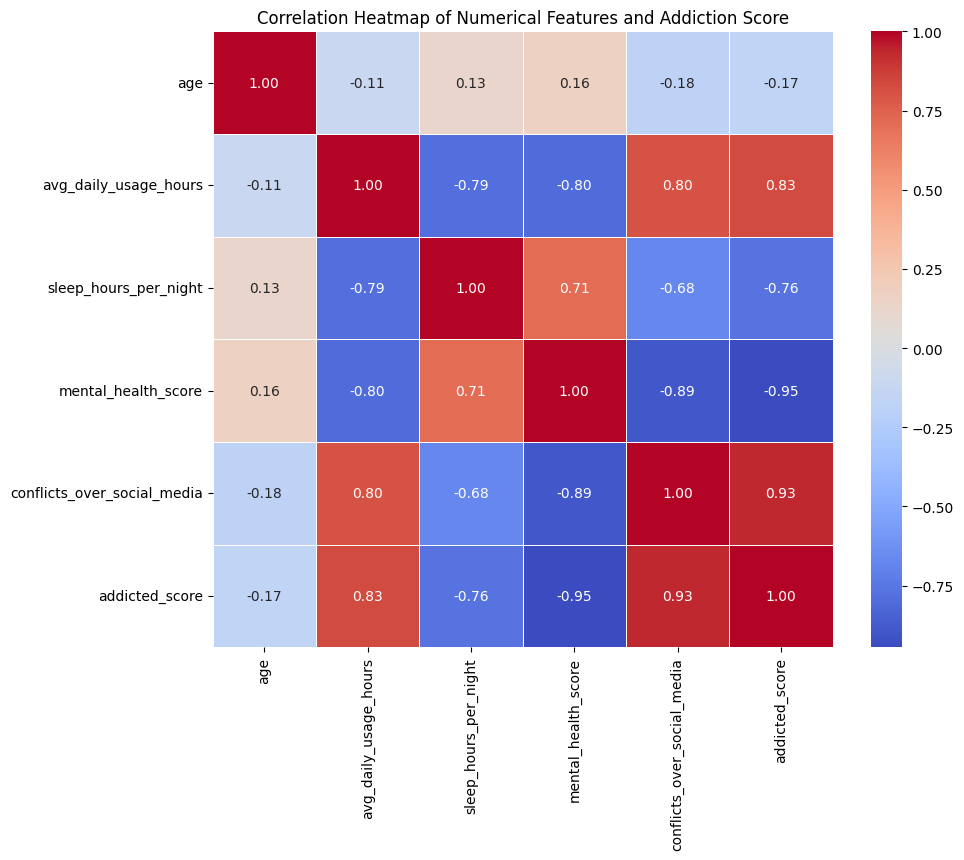

In [23]:
num_col_with_target = num_col + ['addicted_score']
correlation_matrix = df[num_col_with_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Addiction Score')
plt.show()

One hot encoding

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
# Define the target variable 'addicted_score' and convert it to a binary classification problem.
# For example, let's consider 'addicted' if score is 7 or higher, and 'not addicted' otherwise.
y_binary = (df['addicted_score'] >= 7).astype(int)

# Drop the original 'addicted_score' column from features before DictVectorizer
df_features = df.drop(columns=['addicted_score'])

# Apply DictVectorizer to the features DataFrame only
dv = DictVectorizer(sparse=False)
X_dict_features = df_features.to_dict(orient='records')
X_features = dv.fit_transform(X_dict_features)

In [26]:
# Apply scaling to the features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

In [27]:
# Splitting the data into train, test, and validation sets
# X_scaled now contains only features, y_binary is the discrete target
X_full_train, X_test, y_full_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

# No need for reset_index as these are numpy arrays.
# The target is already separated and binarized as y_binary.

In [28]:
len(X_train), len(X_val), len(X_test)

(423, 141, 141)

In [29]:
print(X_train[:5])

[[ 1.08130975 -0.19955703 -1.00141945  1.34075316 -1.34075316  2.38904764
  -0.2536592  -0.88755449 -0.03768892 -0.03768892 -0.03768892 -0.03768892
  -0.03768892 -0.14233936 -0.03768892 -0.03768892 -0.03768892 -0.03768892
  -0.17087153 -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.03768892
  -0.10713432 -0.03768892 -0.2251014  -0.03768892 -0.15238786 -0.03768892
  -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.19955703 -0.03768892
  -0.03768892 -0.03768892 -0.10713432 -0.19955703 -0.03768892 -0.14233936
  -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.28511111
  -0.03768892 -0.03768892 -0.19955703 -0.03768892 -0.17521916 -0.03768892
  -0.17521916 -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.03768892
  -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.03768892 -0.03768892
  -0.10713432 -0.16642354 -0.03768892 -0.19955703 -0.03768892 -0.03768892
  -0.03768892 -0.03768892 -0.16642354 -0.10713432 -0.10713432 -0.03768892
  -0.03768892 -0.03768892 -0.03768892 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [32]:
y_pred_rf = model.predict(X_val)
y_pred_proba_rf = model.predict_proba(X_val)[:, 1]

print("Classification Report for Logistic Regression on Validation Set:")
print(classification_report(y_val, y_pred_rf))
print("AUC Score for Logistic Regression on Validation Set:", roc_auc_score(y_val, y_pred_proba_rf))

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        82

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

AUC Score for Logistic Regression on Validation Set: 1.0


In [33]:
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))
print("AUC Score on Test Set:", roc_auc_score(y_test, y_test_pred_proba))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        79

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

AUC Score on Test Set: 0.9991833401388321


In [34]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

print("Classification Report on Validation Set:")
print(classification_report(y_val, y_pred))
print("AUC Score on Validation Set:", roc_auc_score(y_val, y_pred_proba))

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        82

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

AUC Score on Validation Set: 1.0


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [37]:
y_pred_rf = rf_model.predict(X_val)
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

print("Classification Report for Random Forest on Validation Set:")
print(classification_report(y_val, y_pred_rf))
print("AUC Score for Random Forest on Validation Set:", roc_auc_score(y_val, y_pred_proba_rf))

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        82

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

AUC Score for Random Forest on Validation Set: 1.0


In [38]:
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))
print("AUC Score on Test Set:", roc_auc_score(y_test, y_test_pred_proba))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      0.99        79

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

AUC Score on Test Set: 0.9991833401388321


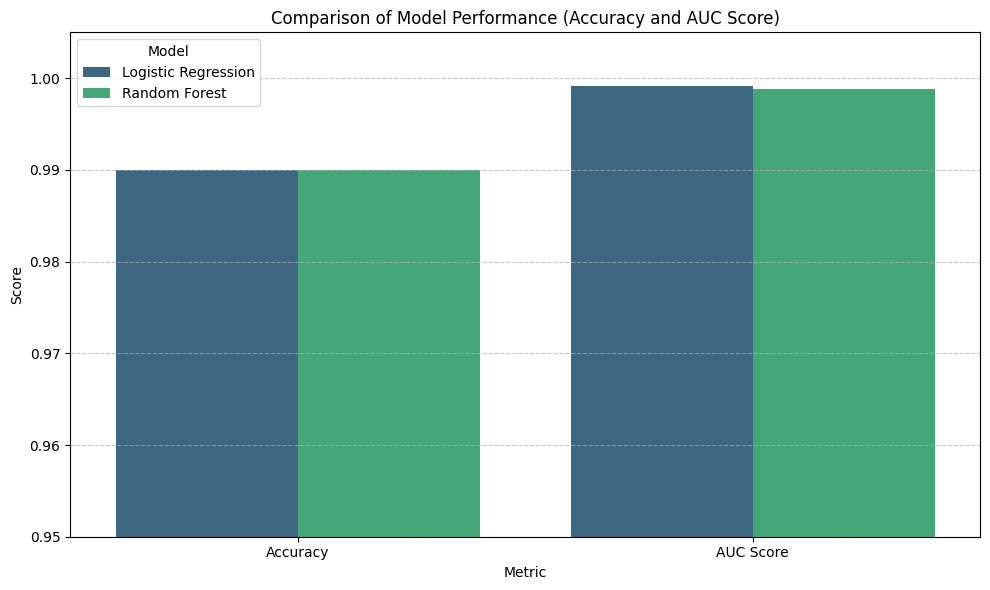

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Performance metrics from previous executions
logistic_regression_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': 0.99,
    'AUC Score': 0.9991833401388321
}

random_forest_metrics = {
    'Model': 'Random Forest',
    'Accuracy': 0.99,
    'AUC Score': 0.9987750102082483
}

# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame([logistic_regression_metrics, random_forest_metrics])

# Melt the DataFrame to prepare for seaborn bar plot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted, palette='viridis')
plt.ylim(0.95, 1.005) # Set y-axis limit to zoom in on the high performance
plt.title('Comparison of Model Performance (Accuracy and AUC Score)')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
joblib.dump(model, "logistic_regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']